In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plots
from analysis import Analysis
from matplotlib import pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import analysis

font_path = '/Users/philipp/Library/Fonts/LinLibertine_R.otf'
matplotlib.rcParams.update({
    'font.family': 'Linux Libertine O',
    'mathtext.fontset': 'custom',
    'mathtext.it': 'Linux Libertine O:italic',
    'mathtext.rm': 'Linux Libertine O',
    # Use 9pt font in plots, to match 9pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

## Global Performance

In [3]:
df_results = plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                                     'measurements/runtime/baran-2024-04-24/',
                                     'measurements/runtime/2024-04-15-baranpp-new/',
                                     'measurements/global-performance/2023-12-01-garf-baseline/',
                                     'measurements/global-performance/2023-12-01-holoclean-baseline/',
                                     'measurements/global-performance/2025-02-16-renuver',
                                     'measurements/global-performance/2025-02-23-narayan/',
                                     metrics='full'
                                    )

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


In [4]:
df_results

ensemble           Mimir                  Baran++                  Baran  \
                      f1 precision recall      f1 precision recall    f1   
normalized_dataset                                                         
beers               0.96      0.96   0.96    0.98      1.00   0.97  0.92   
flights             0.66      0.66   0.66    0.64      0.68   0.61  1.00   
food                0.52      0.53   0.52     NaN       NaN    NaN  0.85   
hospital            0.96      0.96   0.96    0.91      0.94   0.88  0.87   
rayyan              0.82      0.83   0.82    0.64      0.75   0.56  0.41   
tax                 0.63      0.63   0.62     NaN       NaN    NaN   NaN   
bridges 3%          0.89      0.90   0.87    0.84      0.88   0.80  0.78   
bridges 1%          1.00      1.00   1.00    1.00      1.00   1.00  0.86   
cars 3%             0.92      0.93   0.91    0.95      0.99   0.91  0.87   
cars 1%             0.97      0.97   0.96    0.98      1.00   0.97  0.90   
glass 1%            0.82      0.85   0.79    0.88      0.95   0.83  0.87   
glass 3%            0.69      0.73   0.65    0.65      0.79   0.55  0.65   
restaurant 3%       0.52      0.53   0.52    0.50      0.67   0.40  0.38   
restaurant 1%       0.63      0.64   0.62    0.65      0.84   0.53  0.53   
6                   0.98      0.98   0.98    0.92      0.92   0.92  0.10   
137                 0.92      0.92   0.92    0.87      0.87   0.87  0.65   
151                 1.00      1.00   1.00    0.91      0.91   0.91  0.62   
184                 1.00      1.00   1.00    1.00      1.00   1.00  1.00   
1481                1.00      1.00   1.00    1.00      1.00   1.00  1.00   
41027               0.82      0.82   0.82    0.74      0.80   0.70  0.67   
43572               0.90      0.90   0.90    0.88      1.00   0.78  0.30   

ensemble                            HoloClean  ...         Garf            \
                   precision recall        f1  ... recall    f1 precision   
normalized_dataset                             ...                          
beers                   0.95   0.89      0.02  ...   0.01  0.00      0.21   
flights                 1.00   1.00      0.38  ...   0.28  0.01      0.38   
food                    0.90   0.82       NaN  ...    NaN   NaN       NaN   
hospital                0.89   0.86       NaN  ...    NaN  0.31      0.38   
rayyan                  0.53   0.34      0.00  ...   0.00   NaN       NaN   
tax                      NaN    NaN       NaN  ...    NaN   NaN       NaN   
bridges 3%              0.78   0.78      0.01  ...   0.02  0.02      0.01   
bridges 1%              0.86   0.86      0.00  ...   0.00  0.02      0.01   
cars 3%                 0.90   0.85      0.00  ...   0.00  0.01      0.23   
cars 1%                 0.90   0.90      0.00  ...   0.00  0.00      0.04   
glass 1%                0.87   0.87       NaN  ...    NaN  0.00      0.00   
glass 3%                0.68   0.62       NaN  ...    NaN  0.00      0.00   
restaurant 3%           0.57   0.29      0.00  ...   0.00  0.00      0.00   
restaurant 1%           0.62   0.47      0.00  ...   0.00  0.00      0.00   
6                       0.10   0.10       NaN  ...    NaN  0.00      0.00   
137                     0.65   0.65       NaN  ...    NaN  0.00      0.00   
151                     0.62   0.62      0.95  ...   0.94  0.00      0.00   
184                     1.00   1.00      1.00  ...   1.00  0.00      0.00   
1481                    1.00   1.00      1.00  ...   1.00  0.00      0.00   
41027                   0.67   0.67      0.00  ...   0.00  0.00      0.00   
43572                   0.37   0.26       NaN  ...    NaN   NaN       NaN   

ensemble                  RENUVER                  Narayan                   
                   recall      f1 precision recall      f1 precision recall  
normalized_dataset                                                           
beers                0.00     NaN       NaN    NaN    0.44      0.44   0.44  
flights       

In [5]:
plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                        'measurements/runtime/baran-2024-04-24/',
                        'measurements/runtime/2024-04-15-baranpp-new/',
                        'measurements/global-performance/2023-12-01-garf-baseline/',
                        'measurements/global-performance/2023-12-01-holoclean-baseline/',
                        'measurements/global-performance/2025-02-16-renuver',
                        'measurements/global-performance/2025-02-23-narayan/',
                        metrics='f1'
                       )

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


ensemble,Mimir,Baran++,Baran,HoloClean,Garf,RENUVER,Narayan
normalized_dataset,,,,,,,
beers,0.96,0.98,0.92,0.02,0.00,NaN,0.44
flights,0.66,0.64,1.00,0.38,0.01,NaN,0.01
food,0.52,NaN,0.85,NaN,NaN,NaN,0.26
hospital,0.96,0.91,0.87,NaN,0.31,NaN,0.48
rayyan,0.82,0.64,0.41,0.00,NaN,NaN,0.00
tax,0.63,NaN,NaN,NaN,NaN,NaN,0.01
bridges 3%,0.89,0.84,0.78,0.01,0.02,0.37,0.19
bridges 1%,1.00,1.00,0.86,0.00,0.02,0.36,0.14
cars 3%,0.92,0.95,0.87,0.00,0.01,0.02,0.04


In [6]:
plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                        'measurements/runtime/baran-2024-04-24/',
                        'measurements/runtime/2024-04-15-baranpp-new/',
                        'measurements/global-performance/2023-12-01-garf-baseline/',
                        'measurements/global-performance/2023-12-01-holoclean-baseline/',
                        'measurements/global-performance/2025-02-16-renuver',
                        'measurements/global-performance/2025-02-23-narayan/',
                        metrics='precision')

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


ensemble,Mimir,Baran++,Baran,HoloClean,Garf,RENUVER,Narayan
normalized_dataset,,,,,,,
beers,0.96,1.00,0.95,0.44,0.21,NaN,0.44
flights,0.66,0.68,1.00,0.59,0.38,NaN,0.01
food,0.53,NaN,0.90,NaN,NaN,NaN,0.26
hospital,0.96,0.94,0.89,NaN,0.38,NaN,0.48
rayyan,0.83,0.75,0.53,0.00,NaN,NaN,0.00
tax,0.63,NaN,NaN,NaN,NaN,NaN,0.01
bridges 3%,0.90,0.88,0.78,0.01,0.01,0.37,0.19
bridges 1%,1.00,1.00,0.86,0.00,0.01,0.36,0.14
cars 3%,0.93,0.99,0.90,0.01,0.23,0.02,0.04


In [7]:
plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                        'measurements/runtime/baran-2024-04-24/',
                        'measurements/runtime/2024-04-15-baranpp-new/',
                        'measurements/global-performance/2023-12-01-garf-baseline/',
                        'measurements/global-performance/2023-12-01-holoclean-baseline/',
                        'measurements/global-performance/2025-02-16-renuver',
                        'measurements/global-performance/2025-02-23-narayan/',
                        metrics='recall')

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


ensemble,Mimir,Baran++,Baran,HoloClean,Garf,RENUVER,Narayan
normalized_dataset,,,,,,,
beers,0.96,0.97,0.89,0.01,0.00,NaN,0.44
flights,0.66,0.61,1.00,0.28,0.00,NaN,0.01
food,0.52,NaN,0.82,NaN,NaN,NaN,0.26
hospital,0.96,0.88,0.86,NaN,0.26,NaN,0.48
rayyan,0.82,0.56,0.34,0.00,NaN,NaN,0.00
tax,0.62,NaN,NaN,NaN,NaN,NaN,0.01
bridges 3%,0.87,0.80,0.78,0.02,0.02,0.37,0.19
bridges 1%,1.00,1.00,0.86,0.00,0.05,0.36,0.14
cars 3%,0.91,0.91,0.85,0.00,0.00,0.02,0.04


In [8]:
print(plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                        'measurements/runtime/baran-2024-04-24/',
                        'measurements/runtime/2024-04-15-baranpp-new/',
                        'measurements/global-performance/2023-12-01-garf-baseline/',
                        'measurements/global-performance/2023-12-01-holoclean-baseline/',
                        'measurements/global-performance/2025-02-16-renuver',
                        'measurements/global-performance/2025-02-23-narayan/',
                        metrics='recall'
                       ).to_latex(float_format="{:.2f}".format))

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.
\begin{tabular}{lrrrrrrr}
\toprule
ensemble & Mimir & Baran++ & Baran & HoloClean & Garf & RENUVER & Narayan \\
normalized_dataset &  &  &  &  &  &  &  \\
\midrule
beers & 0.96 & 0.97 & 0.89 & 0.01 & 0.00 & NaN & 0.44 \\
flights & 0.66 & 0.61 & 1.00 & 0.28 & 0.00 & NaN & 0.01 \\
food & 0.52 & NaN & 0.82 & NaN & NaN & NaN & 0.26 \\
hospital & 0.96 & 0.88 & 0.86 & NaN & 0.26 & NaN & 0.48 \\
rayyan & 0.82 & 0.56 & 0.34 & 0.00 & NaN & NaN & 0.00 \\
tax & 0.62 & NaN & NaN & NaN & NaN & NaN & 0.01 \\
bridges 3% & 0.87 & 0.80 & 0.78 & 0.02 & 0.02 & 0.37 & 0.19 \\
bridges 1% & 1.00 & 1.00 & 0.86 & 0.00 & 0.05 & 0.36 & 0.14 \\
cars 3% & 0.91 & 0.91 & 0.85 & 0.00 & 0.00 & 0.02 & 0.04 \\
cars 1% & 0.96 & 0.97 & 0.90 & 0.00 & 0.00 & 0.01 & 0.03 \\
glass 1% & 0.79 & 0.83 & 0.87 & NaN & 0.00 & 0.10 & 0.02 \\
glass 3% & 0.65 & 0.55 & 0.62 & NaN & 0.00 & 0.21

## Relative results

In [10]:
df_results = plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                                    'measurements/runtime/baran-2024-04-24/',
                                     'measurements/runtime/2024-04-15-baranpp-new/',
                                     'measurements/global-performance/2023-12-01-garf-baseline/',
                                     'measurements/global-performance/2023-12-01-holoclean-baseline/',
                                     'measurements/global-performance/2025-02-16-renuver',
                                     'measurements/global-performance/2025-02-23-narayan/',
                                     metrics='f1'
                                    )

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


In [11]:
df_results

ensemble,Mimir,Baran++,Baran,HoloClean,Garf,RENUVER,Narayan
normalized_dataset,,,,,,,
beers,0.96,0.98,0.92,0.02,0.00,NaN,0.44
flights,0.66,0.64,1.00,0.38,0.01,NaN,0.01
food,0.52,NaN,0.85,NaN,NaN,NaN,0.26
hospital,0.96,0.91,0.87,NaN,0.31,NaN,0.48
rayyan,0.82,0.64,0.41,0.00,NaN,NaN,0.00
tax,0.63,NaN,NaN,NaN,NaN,NaN,0.01
bridges 3%,0.89,0.84,0.78,0.01,0.02,0.37,0.19
bridges 1%,1.00,1.00,0.86,0.00,0.02,0.36,0.14
cars 3%,0.92,0.95,0.87,0.00,0.01,0.02,0.04


In [12]:
df_results[df_results['Baran'] + 0.03 < df_results['Mimir']]

ensemble,Mimir,Baran++,Baran,HoloClean,Garf,RENUVER,Narayan
normalized_dataset,,,,,,,
beers,0.96,0.98,0.92,0.02,0.00,NaN,0.44
hospital,0.96,0.91,0.87,NaN,0.31,NaN,0.48
rayyan,0.82,0.64,0.41,0.00,NaN,NaN,0.00
bridges 3%,0.89,0.84,0.78,0.01,0.02,0.37,0.19
bridges 1%,1.00,1.00,0.86,0.00,0.02,0.36,0.14
cars 3%,0.92,0.95,0.87,0.00,0.01,0.02,0.04
cars 1%,0.97,0.98,0.90,0.00,0.00,0.01,0.03
glass 3%,0.69,0.65,0.65,NaN,0.00,0.21,0.03
restaurant 3%,0.52,0.50,0.38,0.00,0.00,0.12,0.32


In [13]:
df_results[df_results['Baran'] > df_results['Mimir']]

ensemble,Mimir,Baran++,Baran,HoloClean,Garf,RENUVER,Narayan
normalized_dataset,,,,,,,
flights,0.66,0.64,1.00,0.38,0.01,NaN,0.01
food,0.52,NaN,0.85,NaN,NaN,NaN,0.26
glass 1%,0.82,0.88,0.87,NaN,0.00,0.1,0.02


### Average Performances - Mimir vs Baran

Comparing Baran with Mimir, Mimir succeeds in measuring `tax`, a dataset for which Baran runs out of memory.
To compare the same number of datasets, we exclude `tax` from the comparison.

In [14]:
df_avg_baran = df_results.drop(['tax']).loc[:, ['Mimir', 'Baran']].agg('mean')
print(df_avg_baran)

ensemble
Mimir    0.8490
Baran    0.7115
dtype: float64


In [15]:
mimir_f1 = df_avg_baran['Mimir']
baran_f1 = df_avg_baran['Baran']

imp = round((mimir_f1 - baran_f1)/baran_f1, 3) * 100

print(f'Mimir achieves an improvment of {imp}% relative to Baran in F1 correction score across all datasets.')
print(f'Mimir achieves an average correction F1-Score of {round(mimir_f1*100, 1)}%, Baran {round(baran_f1*100, 1)}%. Mimir is {round((mimir_f1 - baran_f1)*100, 1)}% better.')

Mimir achieves an improvment of 19.3% relative to Baran in F1 correction score across all datasets.
Mimir achieves an average correction F1-Score of 84.9%, Baran 71.2%. Mimir is 13.7% better.


### Average Performances - Mimir vs Baran++

Baran++ exceeds the time limit for `tax` and `food`. We exclude both datasets for a comparison on the same number of datasets.

In [16]:
df_avg_baran = df_results.drop(['tax', 'food']).loc[:, ['Mimir', 'Baran++']].agg('mean')
print(df_avg_baran)

ensemble
Mimir      0.866316
Baran++    0.838947
dtype: float64


In [17]:
mimir_f1 = df_avg_baran['Mimir']
baranpp_f1 = df_avg_baran['Baran++']

imp = round((mimir_f1 - baranpp_f1)/baranpp_f1 * 100, 1)

print(f'Mimir achieves an improvment of {imp}% relative to Baran++ in F1 correction score across all datasets.')
print(f'Mimir achieves an average correction F1-Score of {round(mimir_f1*100, 1)}%, Baran++ {round(baranpp_f1*100, 1)}%. Mimir is {round((mimir_f1 - baranpp_f1)*100, 1)}% better.')

Mimir achieves an improvment of 3.3% relative to Baran++ in F1 correction score across all datasets.
Mimir achieves an average correction F1-Score of 86.6%, Baran++ 83.9%. Mimir is 2.7% better.


## Ablation Study

Loaded Ablation Study. 0/567 measurements failed.
Loaded Ablation Study. 0/567 measurements failed.
Loaded Ablation Study. 0/567 measurements failed.
Loaded Ablation Study. 0/567 measurements failed.


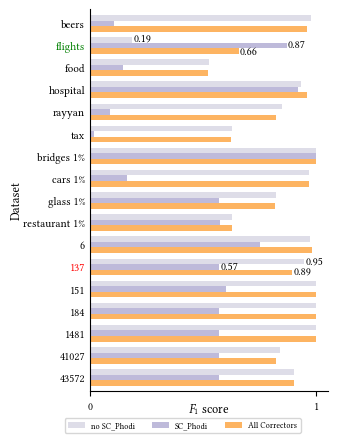

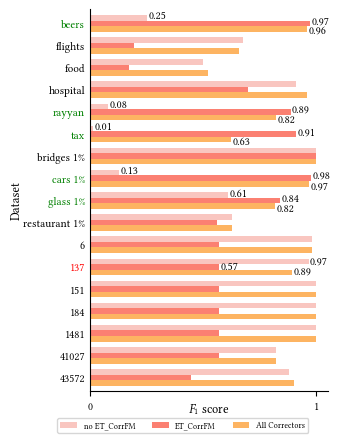

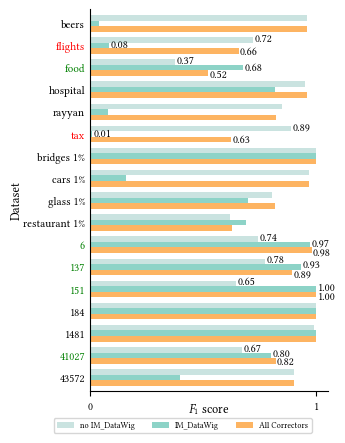

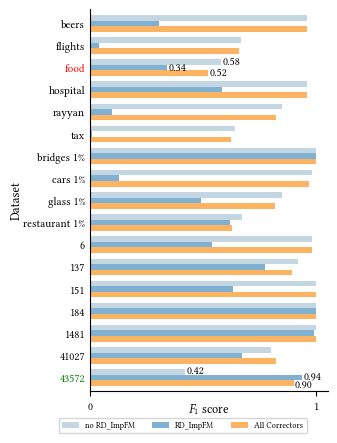

In [18]:
for corrector in ['SC_Phodi', 'ET_CorrFM', 'IM_DataWig', 'RD_ImpFM']:
    fig, ax, df = plots.plot_ablation('measurements/ablation-study/2024-04-27/', corrector)
    plt.savefig(f'./img/2024-07-15-ablation-study-{corrector}.pdf', bbox_inches='tight', pad_inches=0)

## ET_CorrFM vs Value Models

Loaded Mimir Results. 0/252 measurements failed.


/Users/philipp/code/mimir/notebook/plots.py:1176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(custom_labels)


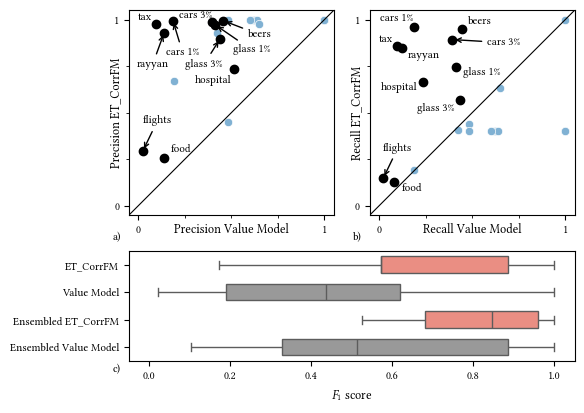

In [19]:
fig, axes, df_scatter = plots.et_corrfm_vs_value_model('measurements/corrfm-vs-value/2024-04-28/')
#plt.savefig('./img/2024-04-28-scatter-et_corrfm-vs-value_model.pdf', bbox_inches='tight')

Loaded Mimir Results. 0/252 measurements failed.


/Users/philipp/code/mimir/notebook/plots.py:1176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(custom_labels)


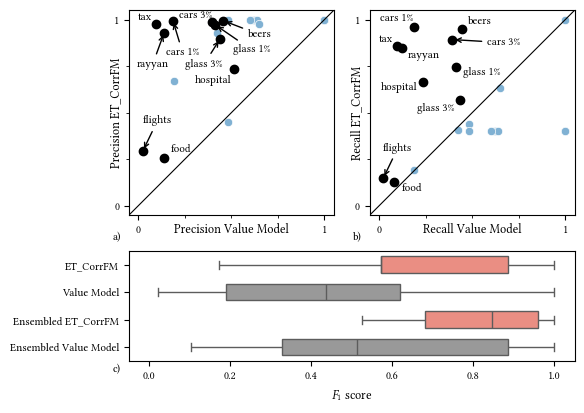

In [20]:
fig, axes, df_scatter = plots.et_corrfm_vs_value_model('measurements/corrfm-vs-value/2024-04-28/')
#plt.savefig('./img/2024-04-28-scatter-et_corrfm-vs-value_model.pdf', bbox_inches='tight')

In [21]:
fig.get_size_inches()

array([6.61309451, 4.08711718])

## Phodi vs Vicinity Models

Loaded Mimir Results. 0/219 measurements failed.


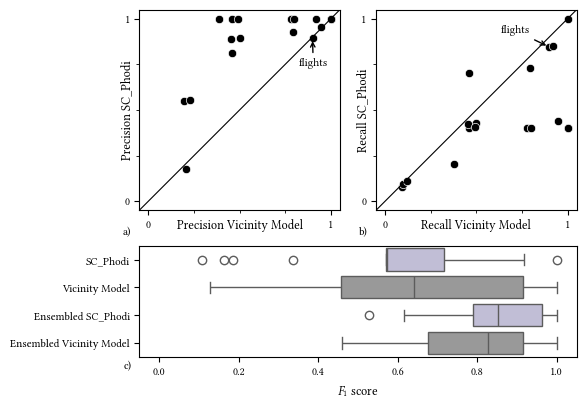

In [22]:
fig, axes, failed = plots.sc_phodi_vs_vicinity_model('measurements/phodi-vs-vicinity/2024-04-28-no-tax-food/')
plt.savefig('./img/2024-04-28-phodi-vs-vicinity.pdf', bbox_inches='tight')

## Runtime

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


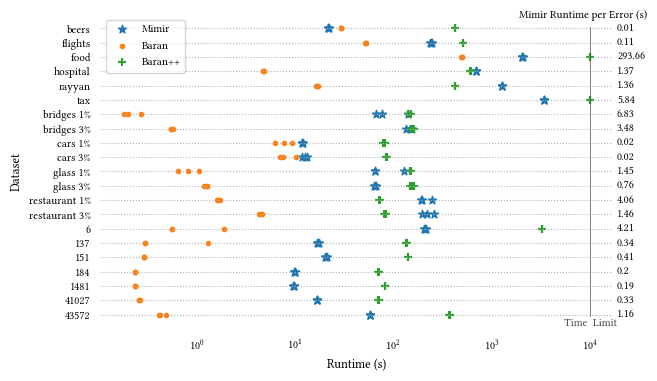

In [37]:
fig, ax, df_mean_runtime_per_error = plots.new_plot_runtime('measurements/runtime/mimir-2024-04-28/', 'measurements/runtime/baran-2024-04-24/', 'measurements/runtime/2024-04-15-baranpp-new/', 'measurements/runtime/2025-03-01-error-stats/', correct_timeouts=True)
plt.savefig('./img/2025-03-02-runtime-with-mimir-mean.pdf', bbox_inches='tight')

In [38]:
df_mean_runtime_per_error

,normalized_dataset,n_errors,mimir,baran,baranpp,baran_per_error,mimir_per_error,baranpp_per_error
0,137,50,17.074009,0.625858,137.045439,0.01,0.34,2.74
1,1481,50,9.684975,0.234970,81.916286,0.00,0.19,1.64
2,151,50,20.576598,0.288926,141.502503,0.01,0.41,2.83
3,184,50,9.950191,0.234903,71.344849,0.00,0.20,1.43
4,41027,50,16.654742,0.260657,70.683339,0.01,0.33,1.41
5,43572,50,57.916774,0.437487,374.537193,0.01,1.16,7.49
6,6,50,210.636205,0.997700,3256.081384,0.02,4.21,65.12
7,beers,1821,21.877999,29.266033,423.965610,0.02,0.01,0.23
8,bridges 1%,14,95.655662,0.216760,145.520300,0.02,6.83,10.39
9,bridges 3%,42,145.980719,0.551472,156.829536,0.01,3.48,3.73


In [39]:
df_export = df_mean_runtime_per_error.loc[:, ['normalized_dataset', 'mimir_per_error', 'baranpp_per_error', 'baran_per_error']]
df_export.columns = ['Dataset', 'Mimir', 'Baran++', 'Baran']
print(df_export.to_latex(index=False,float_format="{:.2f}".format))

\begin{tabular}{lrrr}
\toprule
Dataset & Mimir & Baran++ & Baran \\
\midrule
137 & 0.34 & 2.74 & 0.01 \\
1481 & 0.19 & 1.64 & 0.00 \\
151 & 0.41 & 2.83 & 0.01 \\
184 & 0.20 & 1.43 & 0.00 \\
41027 & 0.33 & 1.41 & 0.01 \\
43572 & 1.16 & 7.49 & 0.01 \\
6 & 4.21 & 65.12 & 0.02 \\
beers & 0.01 & 0.23 & 0.02 \\
bridges 1% & 6.83 & 10.39 & 0.02 \\
bridges 3% & 3.48 & 3.73 & 0.01 \\
cars 1% & 0.02 & 0.10 & 0.01 \\
cars 3% & 0.02 & 0.10 & 0.01 \\
flights & 0.11 & 0.23 & 0.02 \\
food & 293.66 & 1428.57 & 71.02 \\
glass 1% & 1.45 & 2.53 & 0.01 \\
glass 3% & 0.76 & 1.80 & 0.01 \\
hospital & 1.37 & 1.20 & 0.01 \\
rayyan & 1.36 & 0.45 & 0.02 \\
restaurant 1% & 4.06 & 1.40 & 0.03 \\
restaurant 3% & 1.46 & 0.53 & 0.03 \\
tax & 5.84 & 16.98 & NaN \\
\bottomrule
\end{tabular}



Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/75 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


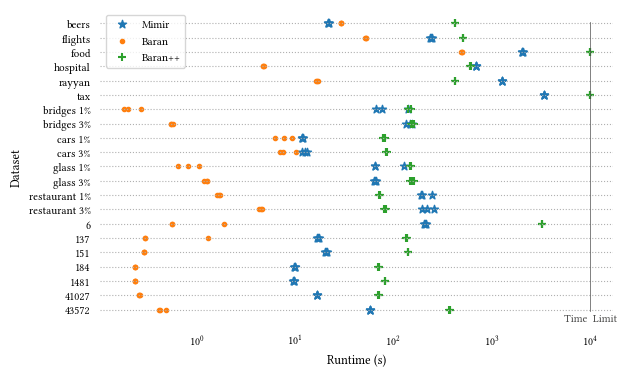

In [25]:
fig, ax = plots.plot_runtime('measurements/runtime/mimir-2024-04-28/', 'measurements/runtime/baran-2024-04-24/', 'measurements/runtime/2024-04-15-baranpp-new/', correct_timeouts=True)
plt.savefig('./img/2024-07-15-runtime.pdf', bbox_inches='tight')

In [43]:
res_mimir_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/mimir-2024-04-28/')
res_baran_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/baran-2024-04-24/')
res_baranpp_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/2024-04-15-baranpp-new/')
 
mimir_runtimes = [r['runtime'] for r in res_mimir_runtime]
baran_runtimes = [r['runtime'] for r in res_baran_runtime]
baranpp_runtimes = [r['runtime'] for r in res_baranpp_runtime]

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


In [54]:
print(f'Mimir runtimes: {len(mimir_runtimes)}')
print(f'Baran runtimes: {len(baran_runtimes)}')
print(f'Baran++ runtimes: {len(baranpp_runtimes)}')

Mimir runtimes: 63
Baran runtimes: 60
Baran++ runtimes: 57


Mimir has a complete set of measurments. Baran runs out of memory on tax and is thus not measured. Baran++ exceeds the time limit on food and tax.

In [55]:
baranpp_runtimes = baranpp_runtimes + [1E4 for _ in range(6)]  # add time limit for the two failing datasets

In [57]:
# Calculate quantiles using numpy
quantiles_mimir = np.percentile(mimir_runtimes, [25, 50, 75])
quantiles_baran = np.percentile(baran_runtimes, [25, 50, 75])
quantiles_baranpp = np.percentile(baranpp_runtimes, [25, 50, 75])

print(f"25th percentile (Q1) Mimir {round(quantiles_mimir[0], 2)}, Baran {round(quantiles_baran[0], 2)} Baran++ {round(np.mean(quantiles_baranpp[0]),2)}")
print(f"25th percentile (Q2/median) Mimir {round(quantiles_mimir[1],2)}, Baran {round(quantiles_baran[1],2)} Baran++ {round(np.mean(quantiles_baranpp[1]),2)}")
print(f"25th percentile (Q3) Mimir {round(quantiles_mimir[2],2)}, Baran {round(quantiles_baran[2],2)} Baran++ {round(np.mean(quantiles_baranpp[2]),2)}")
print(f"Average Mimir {round(np.mean(mimir_runtimes), 2)} Baran {round(np.mean(baran_runtimes),2)} Baran++ {round(np.mean(baranpp_runtimes),2)}")

25th percentile (Q1) Mimir 16.97, Baran 0.29 Baran++ 82.11
25th percentile (Q2/median) Mimir 66.62, Baran 1.26 Baran++ 148.68
25th percentile (Q3) Mimir 240.1, Baran 7.55 Baran++ 428.45
Average Mimir 425.78 Baran 31.41 Baran++ 1287.57


## Raha Global Performance

In [43]:
df_results = plots.raha_ed_table('measurements/global-performance-raha/2025-01-25-raha-detection-results',
                                 'measurements/global-performance-raha/2025-02-02-global-performance-raha',
                                 'measurements/global-performance-raha/2025-02-08-baran-global-performance-raha/'
                                )

Loaded 63 Raha Results.
Loaded Mimir Results. 1/60 measurements failed.
Loaded Mimir Results. 4/63 measurements failed.


In [44]:
df_results

ensemble           Raha & Perfect EC                  Raha & Mimir            \
                                  f1 precision recall           f1 precision   
normalized_dataset                                                             
beers                           1.00      0.99   1.00         0.96      0.96   
flights                         0.80      0.89   0.73         0.39      0.43   
food                            0.00      0.00   0.00          NaN       NaN   
hospital                        0.72      0.92   0.59         0.69      0.89   
rayyan                          0.81      0.81   0.82         0.55      0.55   
tax                             0.83      0.86   0.81         0.54      0.57   
bridges 3%                      0.65      0.71   0.61         0.61      0.64   
bridges 1%                      0.41      0.46   0.38         0.50      0.53   
cars 3%                         1.00      1.00   0.99         0.92      0.93   
cars 1%                         0.99      1.00   0.97         0.97      0.98   
glass 1%                        0.84      1.00   0.73         0.77      0.93   
glass 3%                        0.87      1.00   0.78         0.63      0.74   
restaurant 3%                   0.67      0.89   0.56         0.27      0.35   
restaurant 1%                   0.43      0.83   0.30         0.44      0.84   
6                               1.00      1.00   1.00         0.75      0.75   
137                             1.00      1.00   1.00         0.87      0.87   
151                             1.00      1.00   1.00         1.00      1.00   
184                             1.00      1.00   1.00         1.00      1.00   
1481                            1.00      1.00   1.00         1.00      1.00   
41027                           1.00      1.00   1.00         0.78      0.78   
43572                           0.67      0.67   0.67         0.90      0.90   

ensemble                  Raha & Baran                   
                   recall           f1 precision recall  
normalized_dataset                                       
beers                0.96         0.90      0.91   0.88  
flights              0.36         0.58      0.84   0.45  
food                  NaN          NaN       NaN    NaN  
hospital             0.58         0.64      0.86   0.51  
rayyan               0.55         0.39      0.55   0.31  
tax                  0.53         0.70      0.78   0.64  
bridges 3%           0.60         0.56      0.60   0.53  
bridges 1%           0.48         0.45      0.51   0.40  
cars 3%              0.90         0.89      0.91   0.88  
cars 1%              0.95         0.87      0.89   0.86  
glass 1%             0.67         0.74      0.88   0.65  
glass 3%             0.54         0.56      0.71   0.46  
restaurant 3%        0.23         0.35      0.70   0.24  
restaurant 1%        0.31         0.27      0.52   0.19  
6                    0.75         0.10      0.10   0.10  
137                  0.87         0.55      0.55   0.55  
151                  1.00         0.63      0.63   0.63  
184                  1.00         1.00      1.00   1.00  
1481                 1.00         1.00      1.00   1.00  
41027                0.78         0.45      0.45   0.45  
43572                0.90         0.58      0.90   0.43

## Defect User

In [10]:
df_defect = plots.defect_user_table('measurements/defect-user/2025-02-15-mimir/', 'measurements/defect-user/2025-02-09-baran/')

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/63 measurements failed.


In [11]:
df_defect

ensemble           Mimir                  Baran                 
                      f1 precision recall    f1 precision recall
normalized_dataset                                              
beers               0.04      0.51   0.02  0.03      0.03   0.03
flights             0.39      0.39   0.38  0.01      0.01   0.01
food                0.44      0.44   0.44  0.29      0.32   0.26
hospital            0.67      0.67   0.67  0.11      0.15   0.09
rayyan              0.00      0.00   0.00  0.04      0.04   0.04
tax                 0.01      0.01   0.01  0.00      0.00   0.00
bridges 3%          0.18      0.18   0.17  0.14      0.14   0.14
bridges 1%          0.00      0.00   0.00  0.05      0.05   0.05
cars 3%             0.00      0.00   0.00  0.01      0.02   0.01
cars 1%             0.00      0.00   0.00  0.01      0.01   0.01
glass 1%            0.05      0.07   0.04  0.03      0.03   0.02
glass 3%            0.13      0.18   0.11  0.03      0.03   0.03
restaurant 3%       0.24      0.30   0.20  0.05      0.05   0.05
restaurant 1%       0.14      0.18   0.12  0.04      0.04   0.04
6                   0.35      0.38   0.33  0.07      0.07   0.07
137                 0.00      0.00   0.00  0.30      0.30   0.30
151                 0.05      0.09   0.04  0.39      0.39   0.39
184                 0.57      1.00   0.40  1.00      1.00   1.00
1481                0.57      1.00   0.40  1.00      1.00   1.00
41027               0.00      0.00   0.00  0.46      0.46   0.46
43572               0.00      0.00   0.00  0.17      0.17   0.17

## LLM Inference Measurement

In [26]:
results = [{**x, 'execution': 'iterative'} for x in plots.load_llm_inference_runtime('measurements/llm-response-time/2025-03-01-impfm-beers/iterative/')]
results.extend([{**x, 'execution': 'concurrent'} for x in plots.load_llm_inference_runtime('measurements/llm-response-time/2025-03-01-impfm-beers/concurrent/')])

df_llm = pd.DataFrame(results)
df_llm['runtime'] = df_llm['end_time'] - df_llm['start_time']

In [32]:
batch_runtime_it = df_llm[df_llm['execution'] == 'iterative'].end_time.max() - df_llm[df_llm['execution'] == 'iterative'].start_time.min()
batch_runtime_co = df_llm[df_llm['execution'] == 'concurrent'].end_time.max() - df_llm[df_llm['execution'] == 'concurrent'].start_time.min()

In [34]:
print(f'Iterative execution runtime: {batch_runtime_it}s for 100 requests.')
print(f'Concurrent execution runtime: {batch_runtime_co}s for 100 requests.')

Iterative execution runtime: 46.0022246837616s for 100 requests.
Concurrent execution runtime: 7.260688781738281s for 100 requests.


In [37]:
runtimes = df_llm['runtime'].values
quantiles = np.percentile(runtimes, [25, 50, 75])

print(f"25th percentile (Q1) {round(quantiles[0], 2)}s")
print(f"25th percentile (Q2/median){round(quantiles[1],2)}s")
print(f"25th percentile (Q3) {round(quantiles[2],2)}s")
print(f"Average {round(np.mean(runtimes),2)}s")

25th percentile (Q1) 0.4s
25th percentile (Q2/median)0.42s
25th percentile (Q3) 0.48s
Average 0.47s


## Scalability

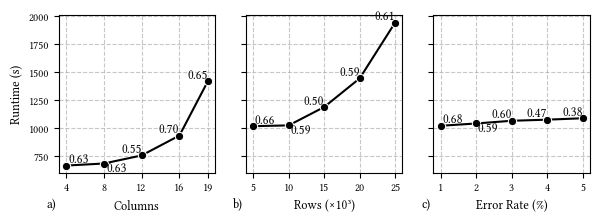

In [238]:
fig, ax, measurements = plots.scalability_experiment()
plt.savefig('./img/2025-03-05-scalability.pdf', bbox_inches='tight')